Rafiei, M.H. and Adeli, H. (2015). â€œA Novel Machine Learning Model for Estimation of Sale Prices of Real Estate Units.â€ ASCE, Journal of Construction Engineering & Management, 142(2), 04015066.

In [70]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

### Residential Building Regressions

#### Question:

Which regression model will perform better at estimating construction costs of real estate units and why?

Three models will be used predict construction costs based off of   the economic variables to predict the construction costs. The models we will be using are:

    Logistic regression
    Ridge logistic regression
    Lasso logistic regression

Ridge and Lasso can be carried out by specifying L1 or L2 regularization for sci kit learn’s logistic regression.

#### Data:

Data can be found at the UC Irvine Machine Learning Repository [1].

In [97]:
building = pd.read_excel('building_data.xlsx', header=1)
building.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,sales_price,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


In [98]:
print("\nObservations : %d\n" % (building.shape[0]))


Observations : 372



### Exploratory data analysis

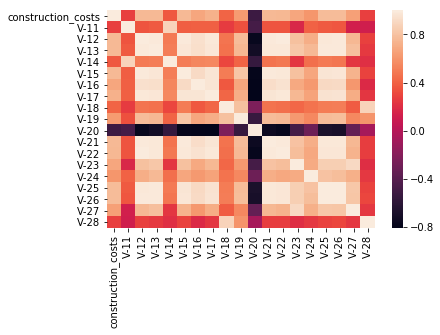

In [100]:
building = building.rename(columns={'V-10':'construction_costs'})
building = building[['construction_costs','V-11','V-12','V-13','V-14','V-15','V-16','V-17',
             'V-18','V-19','V-20','V-21','V-22','V-23','V-24',
             'V-25','V-26','V-27','V-28']]



sns.heatmap(building.corr())

Alpha Value: 10
R squared:  0.6238293490706492
Average Coefficients:  0.8071207559920582
Root Mean Squared Error:  99.60986247613748


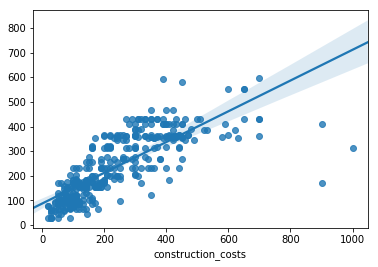

In [110]:
X = building.drop(['construction_costs'], 1)
y = building['construction_costs']

XR=X
yR=y

rcv = linear_model.RidgeCV(alphas=
                           (.001, .001, .01, .1, .5, 1,2,3,4,5,6,7,8,9,10),
                           cv=5,
                          )

rcv_model = rcv.fit(XR, yR)

print ("Alpha Value:", (rcv_model.alpha_))

y_predR = rcv_model.predict(XR)
lr_r2 =  r2_score(yR, y_predR)
#lr_r2 = rcv.score(XR, yR)
print ("R squared: ", (lr_r2))
print ("Average Coefficients: ", (abs(rcv_model.coef_).mean()))
print ("Root Mean Squared Error: ", sqrt(mean_squared_error(yR, y_predR)))
ax = sns.regplot(yR, y_predR)



c:\users\greg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\greg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\greg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\greg\appdata\local\programs\python\python36\lib\site-packages\sklearn\

Alpha Value:  10.0
R squared:  0.6228993900533784
Average Coefficients:  0.3304232494634014
Root Mean Squared Error:  99.7329128908721


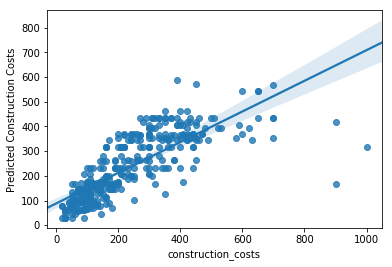

In [121]:
XL=X
yL=y

lcv = linear_model.LassoCV(alphas=
                           (.0001, .001, .01, .1, .5, 1,10,25,30,35,40,41,42,43,44,45,46,47,48,49,50,60,100), cv=5)

lcv_model = lcv.fit(XL, yL)

print ("Alpha Value: ", (lcv_model.alpha_))

y_predL = lcv_model.predict(XL)
lr_r2 =  r2_score(yL, y_predL)
print ("R squared: ", (lr_r2))
print ("Average Coefficients: ", (abs(lcv_model.coef_).mean()))
print ("Root Mean Squared Error: ", sqrt(mean_squared_error(yL, y_predL)))

ax = sns.regplot(yL, y_predL)
plt.ylabel("Predicted Construction Costs")
plt.show()

#### Conclusion

Both regressions came up with very similar results. The advantage of LASSO regression comes when there is many variables, in this regression there isn't enough variables for LASSO regression to have an advantage. Looking at the heatmap we can see that many of the variables are correlated which gives an advantage to Ridge regression. If we were to include all of the variables and not just the economic variables then I would predict that LASSO regression would perform better.